<a href="https://colab.research.google.com/github/Shreya-data/Transport-Demand-Prediction/blob/main/Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Transport Demand Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Shreya Agrawal(Individual)

# **Project Summary -**

Nairobi-Transport-Demand-Prediction dataset provided to us is in unformatted manner, uneven data, and duplicate data and also some data columns in it is irrelevant. For doing the analysis on the data, the data needs to be in correct format and well organized formed. 

As I read the data present in the file and gone through the details in each and every column. The data set was huge in which some of the data was not required for the analysis so the data was cleaned by dropping some unwanted columns and obtained the target variable "number of ticket", this is got from ride id. then created a new data frame, with the columns we required for the analysis including target variable. 

I used feature engineering to get useful columns out of irrelevent column.
Each and every column were compared to gain the insights about the data by doing the exploratory data analysis using python. and also saw the distribution of target variable. Cleaning the dataset, statistically analysing the data and visualizing the data by plotting the data into different graph and charts so that the trend and relationship between the various indicators can be understand easily, Modelling and Predicting the model using Machine learning algorithms.

To preform linear regression, we have to fulfil the assumption of it. so I used Variance inflation factor(VIF) and heatmap to compute multicollinearity in the dataset, I remove the features which have high multicollinearity and acquire the best features for regression. Perform train test split, feature scaling by zscore. I used different types of regression algorithm to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso), and used all the feature without checking multicollinearity to train our model like, Decision tree regressor, Random Forest regressor, and XGboost regresssor and Also I tuned the parameters of  Regularized linear regression (Ridge and Lasso), Random Forest regressor and XGboost regressor and also found the important features for training the model. 

Out of them XGboost with tuned hyperparameters gave the best result.

This resulting model can be used by Mobiticket and bus operators to anticipate customer demand for certain rides, to manage resources and vehicles more efficiently, to offer promotions and sell other services more effectively, such as microinsurance, or even improve customer service by being able to send alerts and other useful information to customers.

# **GitHub Link -**

https://github.com/Shreya-data/Transport-Demand-Prediction

## <b> Problem Statement </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 17 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 17 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 17 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.

## <b> Variables Description </b>

* #### **ride_id**: unique ID of a vehicle on a specific route on a specific day and time.
* #### **seat_number**: seat assigned to ticket.
* #### **payment_method**: method used by customer to purchase ticket from Mobiticket. (cash or Mpesa)
* #### **payment_receipt**: unique id number for ticket purchased from Mobiticket.
* #### **travel_date**: date of ride departure. (DD/MM/YYYY)
* #### **travel_time**: scheduled departure time of ride. (hh:mm)
* #### **travel_from**: town from which ride originated.
* #### **travel_to**: destination of ride. All rides are to Nairobi.
* #### **car_type**: vehicle type. (shuttle or bus)
* #### **max_capacity**: maximum number of seats on the vehicle.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pd.options.display.max_columns = 100

In [4]:
# read the dataset      
dataset = pd.read_csv('/content/drive/MyDrive/train_revised.csv')
#first 5 values
dataset.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [5]:
#last 5 values
dataset.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


#**Understanding The data**

In [6]:
#shape
dataset.shape

(51645, 10)

In [7]:
#information about null value and datatype for each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
#change datatype of ride_id and max_capacity from int to object because it is also a nominal categorial data and we want their categorical description.
dataset[["ride_id","max_capacity"]]=dataset[["ride_id","max_capacity"]].astype(str)

In [9]:
#categorical description
dataset.describe(include='object')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645,51645,51645,51645,51645,51645,51645,51645,51645,51645
unique,6249,61,2,51645,149,78,17,1,2,2
top,8454,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,49
freq,50,2065,51532,1,856,3926,22607,51645,31985,31985


#**Summary:-**
1. In Ride_id, there are 6249 unique values.

2. There are total 61 unique seats in this dataset.

3. Travelers have used 2 types of payment method and most of the people(i.e. 51532 out of 51645) have used Mpesa to pay for their ticket.

4.  The record of 149 days is present in this dataset.

5. In travel_time, there are 78 unique time.

6. There are 17 towns where rides are originated and 22607 rides are only originated from Kisii.

7. There are 2 type of cars and most of them(31985 out of 51645) are bus.

8. There are 2 Maximum seat capacity and most of them have 49 seat capacity and frequency of 49 seat capacity is equal to frequency of bus, Thus we say that Bus have 49 seat capacity.









In [10]:
#get columns of the dataset
column = dataset.columns

In [11]:
#column name
column

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [12]:
#finding the relation between car_type and max_capacity
dataset.groupby(['car_type','max_capacity'])['max_capacity'].count().unstack()

max_capacity,11,49
car_type,,
Bus,NaN,31985.0
shuttle,19660.0,NaN


We conclude that bus has 49 seat capacity and shuttle has 11 seat capacity.

In [13]:
#finding the relation between car_type and travel_from
dataset.groupby(['travel_from','car_type'])['car_type'].count().unstack()

car_type,Bus,shuttle
travel_from,,
Awendo,1788.0,NaN
Homa Bay,6304.0,NaN
Kehancha,1909.0,NaN
Kendu Bay,1.0,NaN
Keroka,341.0,647.0
Keumbu,3.0,19.0
Kijauri,408.0,623.0
Kisii,4236.0,18371.0
Mbita,378.0,NaN


as we see that, Shuttle only used for travel from Keroka, Keumbu, Kijauri and Kisii town, whereas bus used for travel from all the town.

#**Finding Our Target Variable**

Since we are not given the target variable so we need to find target variable first.

There might be many ways of finding the target variable but here I am using one way that is I will find the count of each ride_id and that will be the number_of_ticket, this will be our target variable.

In [14]:
#apply groupby on ride_id to get number of ticket
label=dataset.groupby(["ride_id"]).seat_number.count().sort_values(ascending=False).rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,8454,50
1,10834,49
2,8090,49
3,11382,49
4,13211,49


Now we found our target variable so let us delete the duplicate values from ride_id

In [15]:
#drop duplicates
dataset1=dataset.drop_duplicates("ride_id")

In [16]:
#shape of new dataset after dropping duplicates
dataset1.shape

(6249, 10)

In [17]:
#merge target variable and independent variable on the basis of ride_id
dataset2 = dataset1.merge(label, how="left",on="ride_id")
dataset2.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [18]:
#remove ineffectual columns
dataset2 = dataset2.drop(['seat_number','payment_receipt'], axis=1)

#**Removing Constant Features**

We need to first remove the constant features.

In [19]:
#travel_to is a constant features because it takes only 1 values (i.e., Nairobi)
dataset2.drop(["travel_to"],axis=1,inplace=True)

#**Feature Engineering**

In [20]:
travel_date=pd.to_datetime(dataset2["travel_date"],dayfirst=True).astype("str")

In [21]:
dataset2["date"]= travel_date+" "+dataset2["travel_time"]

In [22]:
dataset2

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 7:15
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 7:12
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 7:05
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 7:10
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 7:12
...,...,...,...,...,...,...,...,...,...
6244,13812,Mpesa,20-04-18,23:10,Ndhiwa,Bus,49,11,2018-04-20 23:10
6245,13813,Mpesa,20-04-18,7:05,Ndhiwa,Bus,49,11,2018-04-20 7:05
6246,13825,Mpesa,20-04-18,7:09,Rongo,Bus,49,1,2018-04-20 7:09
6247,13826,Mpesa,20-04-18,8:00,Awendo,Bus,49,1,2018-04-20 8:00


In [23]:
#define a function based on time features
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [6,7] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [24]:
#call the function 
dataset_new = time_features(dataset2)

In [25]:
#new dataframe with addition of time features
dataset_new.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11


In [26]:
#for particular car type
dataset_bus=dataset_new[dataset_new["car_type"]=="Bus"]
dataset_shuttle=dataset_new[dataset_new["car_type"]=="shuttle"]

In [27]:
#tuple
datasets=(dataset_bus,dataset_shuttle)

In [28]:
#car_type value
dataset_new["car_type"].unique()

array(['Bus', 'shuttle'], dtype=object)

# **UNIVARIATE ANALYSIS**



**Number of ticket**

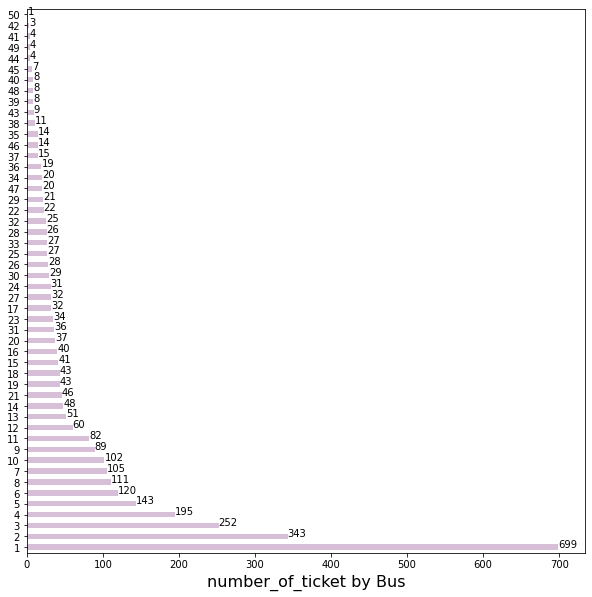

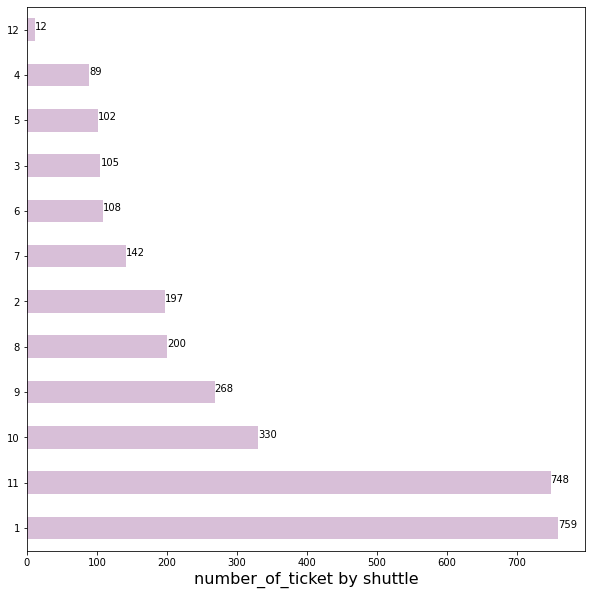

In [29]:
#countplot for both number of ticket when travel is done by bus and by shuttle
for d,car in zip(datasets,dataset_new["car_type"].unique()):
  y=d["number_of_ticket"].value_counts().reset_index()["number_of_ticket"]
  #barplot 
  plt.figure(figsize=(10,10))
  d["number_of_ticket"].value_counts().plot(kind='barh',color="thistle")
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.xlabel("number_of_ticket by " + car, fontsize=16)
  plt.show()

**Summary:**

By Bus, Number of ticket 1 is most frequent with value 699.

By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 748 respectively.


In [30]:
#let's check for a particular number of ticket 50 which has frequency 1 i.e., 50 people are travel from the particular vehicle on a specific route on a specific day and time.
dataset_new[dataset_new["number_of_ticket"]==50]

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month
1924,8454,Mpesa,09-01-18,7:00,Sirare,Bus,49,50,2018-01-09 07:00:00,1,9,9,7,0,0,2018,1,1


Highest number of tickets is 50, in bus to travel from Sirare to Nairobi at 7:00 A.M. on 09-01-18 and payment is done using Mpesa.

In [31]:
len(dataset_new[dataset_new["number_of_ticket"]>40])

74

Total number of tickets which is greater than 40 are only 74.

In [32]:
len(dataset_new[dataset_new["car_type"]=="shuttle"])

3060

In [33]:
len(dataset_new[(dataset_new["number_of_ticket"]>10) & (dataset_new["car_type"]=="shuttle")])/len(dataset_new[dataset_new["car_type"]=="shuttle"])

0.24836601307189543

we conclude that 25% of shuttles were utilize their full capacity.

In [34]:
last_date=dataset_new["date"].max()
first_date=dataset_new["date"].min()
print(f"dataset have data between {first_date} and {last_date}")

dataset have data between 2017-10-17 07:15:00 and 2018-04-20 23:10:00


In [35]:
#function for plotting countplot with values on their top.
def countplot_values(feature):
  y=dataset_new[feature].value_counts().reset_index()[feature]
  #barplot 
  plt.figure(figsize=(10,10))
  dataset_new[feature].value_counts().plot(kind='barh',color="thistle")
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.show()
  return feature


**Payment method**

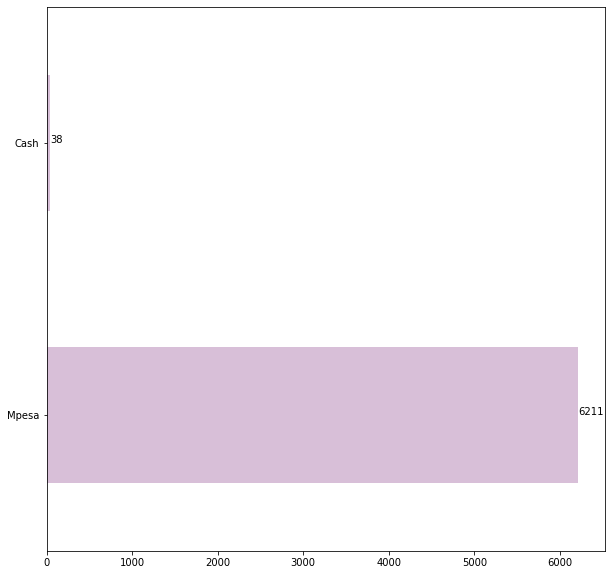

'payment_method'

In [36]:
countplot_values("payment_method")

Mpesa is used mostly in Payment mode type, i.e., cash is less prefered by the people who travel to Nairobi.


**Car type**

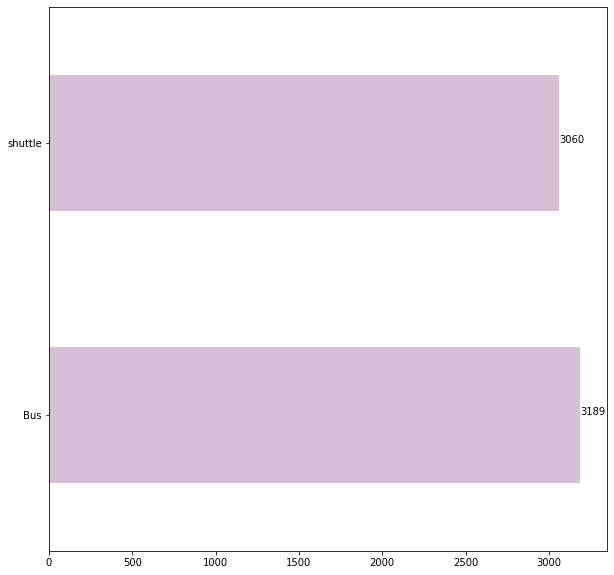

'car_type'

In [37]:
countplot_values("car_type")

Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).


**Travel time**

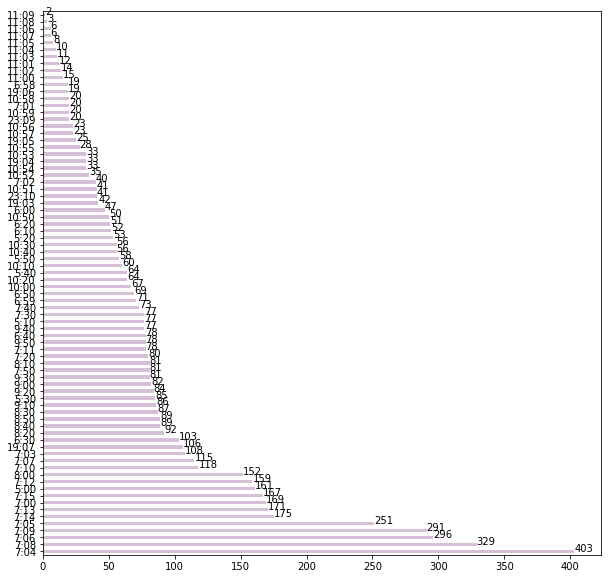

'travel_time'

In [38]:
countplot_values('travel_time')

Most prefer time for travel to Nairobi is 7:04 A.M., 7:08 A.M. and 7:06 A.M. because most vehicle are began at 7:04 A.M., 7:08 A.M. and 7:06 A.M. for travel to Nairobi.

**Travel from**

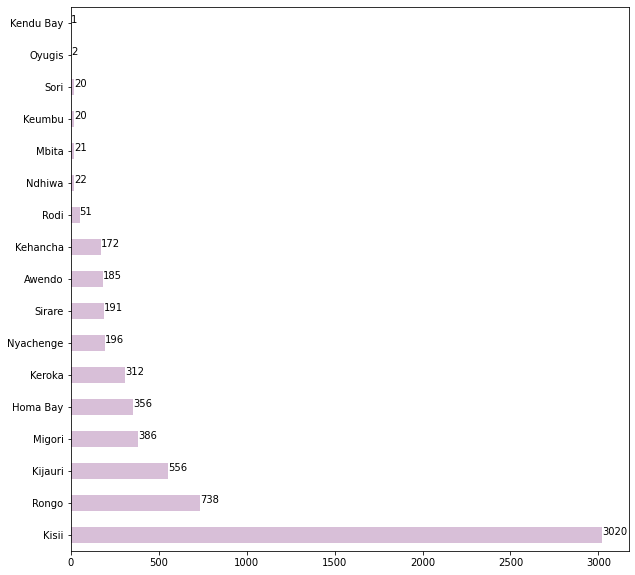

'travel_from'

In [39]:
countplot_values('travel_from')

Mostly vehicle are originated from Kisii, Rongo and Kijauri.

**Quarter**

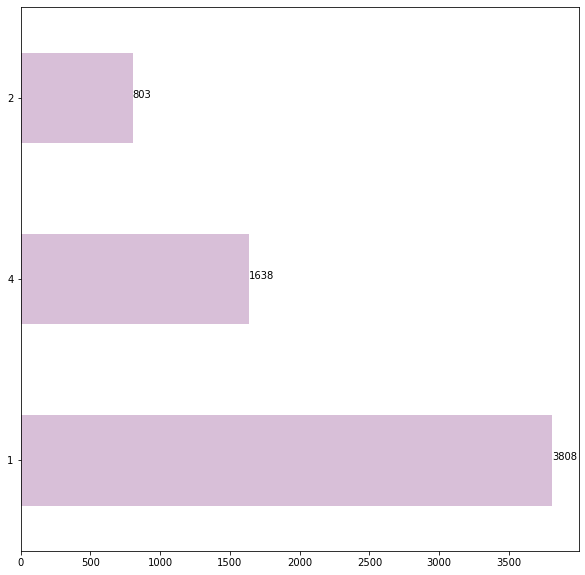

'quarter'

In [40]:
countplot_values('quarter')

we conclude that maximum vehicles are used in quarter 1.

**year**

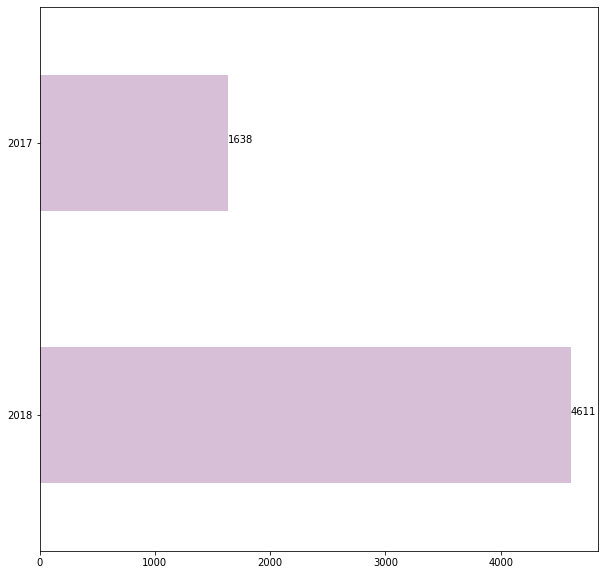

'year'

In [41]:
countplot_values('year')

This dataset contains data of 2 year.(i.e. 2017 and 2018)

**Month**

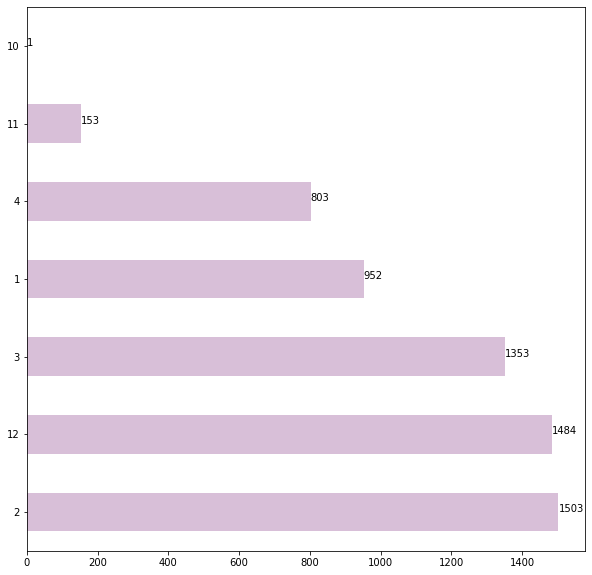

'month'

In [42]:
countplot_values('month')

we conclude that maximum vehicles are used in month 2, 12 and 3.

#**Summary**
From all of these plot, as we saw that,

* By Bus, Number of ticket 1 is most frequent with value 699.

* By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 748 respectively.

* Mpesa is used mostly in Payment mode type, i.e., cash is less prefered by the people who travel to Nairobi.

* Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).

* Mostly vehicle are originated from Kisii, Rongo and Kijauri.

* Most prefer time for travel to Nairobi is 7:04 A.M., 7:08 A.M. and 7:06 A.M..

* This dataset contains data of 2 year (i.e. 2017 and 2018).

* we conclude that maximum vehicles are used in quarter 1.

* we conclude that maximum vehicles are used in month 2, 12 and 3.

In [43]:
#convert travel time unit into hour.
dataset_new["travel_time"] = dataset_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [44]:
#all columns of dataset_new
dataset_new.columns.values

array(['ride_id', 'payment_method', 'travel_date', 'travel_time',
       'travel_from', 'car_type', 'max_capacity', 'number_of_ticket',
       'date', 'day_of_week', 'day_of_year', 'day_of_month', 'hour',
       'minute', 'is_weekend', 'year', 'quarter', 'month'], dtype=object)

In [45]:
#relevent column for histogram
plot_col=['number_of_ticket','travel_time','day_of_month', 'day_of_week',"month"]

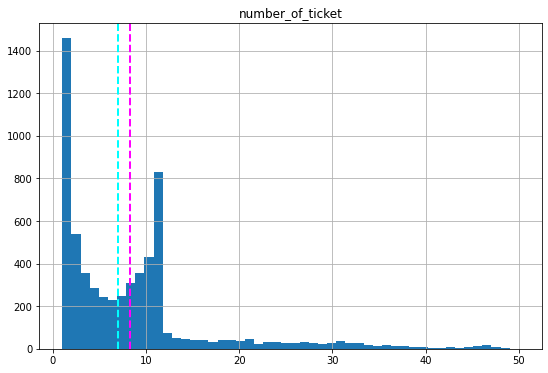

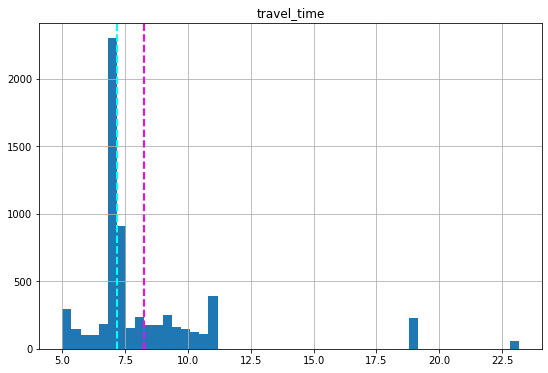

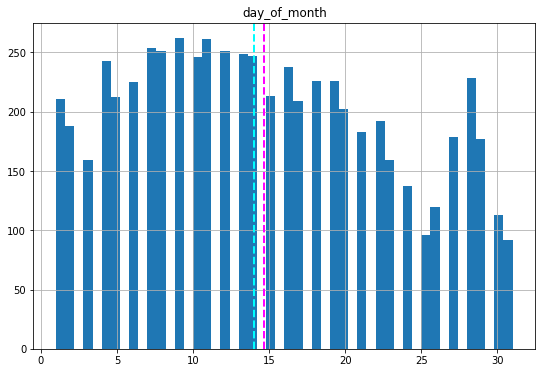

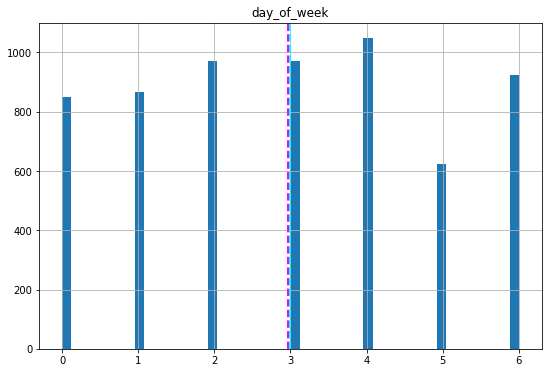

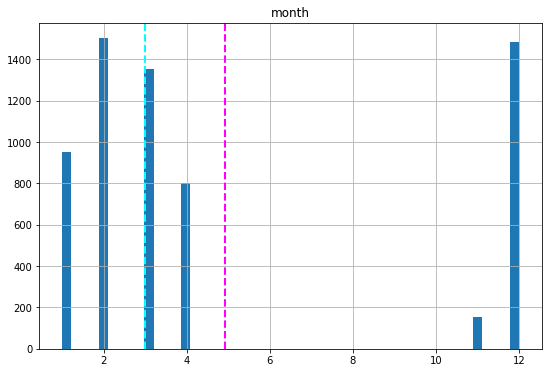

In [46]:
#histogram
for col in plot_col[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset_new[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# **Summary:**
As we know that, positive skewed, negative skewed and no skewed in the data is determined by mean, median amd mode.

if mean > median > mode then, distribution of the data is positively skewed,

if mean = median = mode then, no skewed that is normally distributed,

otherwise, it is negatively skewed.


There is a positive skewed in number_of_ticket, ticket_time & month and day_of_month and approximately no skewed in day_of_week.


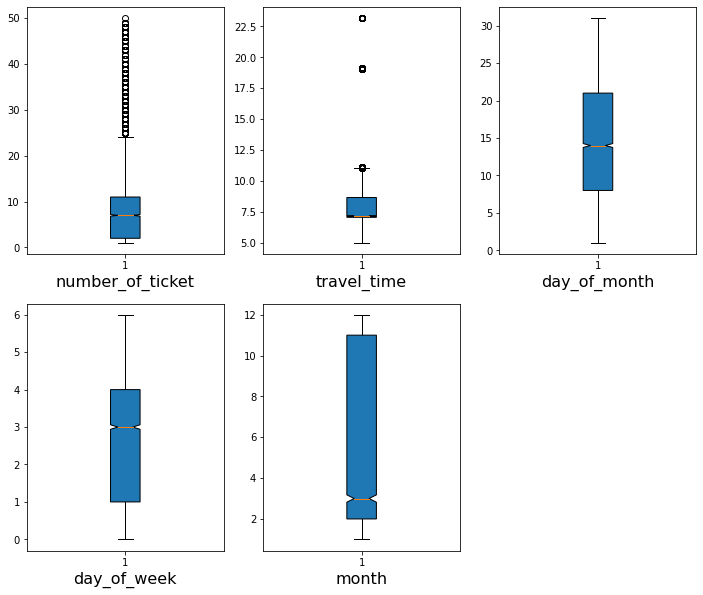

In [47]:
#boxplot
plt.figure(figsize=(12,10))
for x,y in zip(range(1,len(plot_col)+1),plot_col):
    plt.subplot(2,3,x)
    plt.boxplot(dataset_new[y],patch_artist=True,notch=True)
    plt.xlabel(y,fontsize=16)
#plt.title("Time series on cyber crime in State/UT",fontsize=25) 
plt.show()

#**Summary:**
Boxplot gives us 5 point summary which consists of the minimum point, the first quartile, the median, the third quartile, and the maximum point. 

from Boxplot, we have got to know about outliers, as we see that, day_of_month, day_of_week, month have no outlier, but travel_time and number_of_ticket have a lot of outliers. 

# **BIVARIATE ANALYSIS**

**Travel from different Cars**

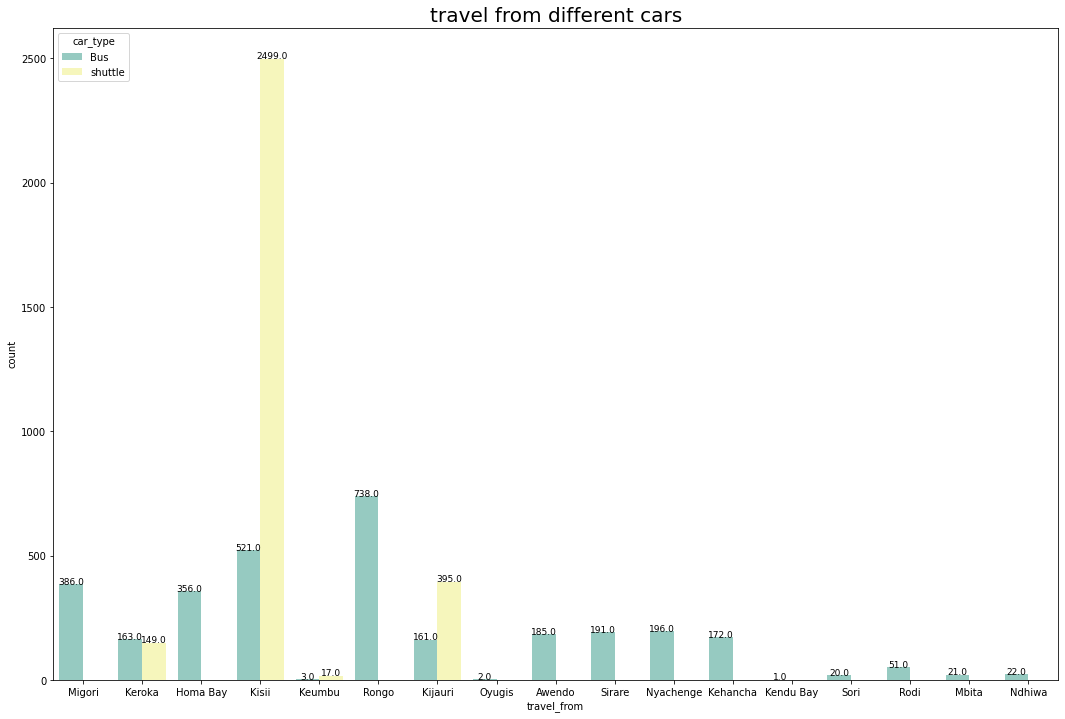

In [48]:
plt.figure(figsize=(18,12))

ax = sns.countplot(dataset_new['travel_from'],hue=dataset_new['car_type'],palette="Set3")

plt.title("travel from different cars",size=20)

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 9)
    
plt.show()

#**Summary:**

2499 and 521 people are travel by bus and shuttle respectively from kisii between 17-10-17 and 20-04-18 which is maximum among all town.

In [49]:
dataset_new.describe(include=["object"]).columns.values

array(['ride_id', 'payment_method', 'travel_date', 'travel_from',
       'car_type', 'max_capacity'], dtype=object)

In [50]:
categorical_features=['payment_method','travel_from','car_type']

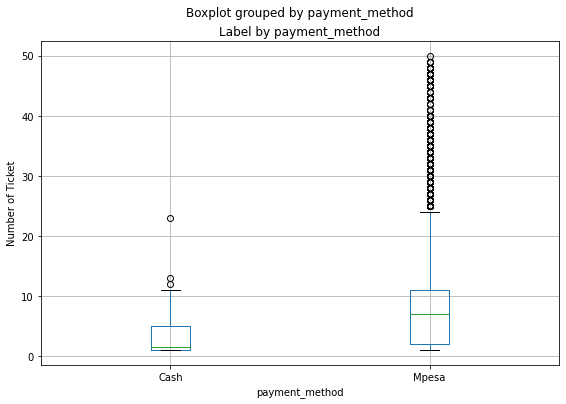

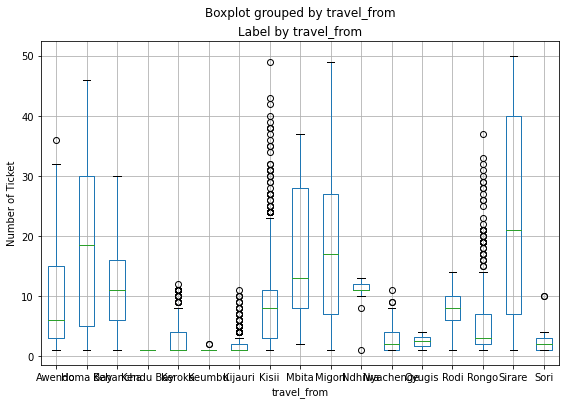

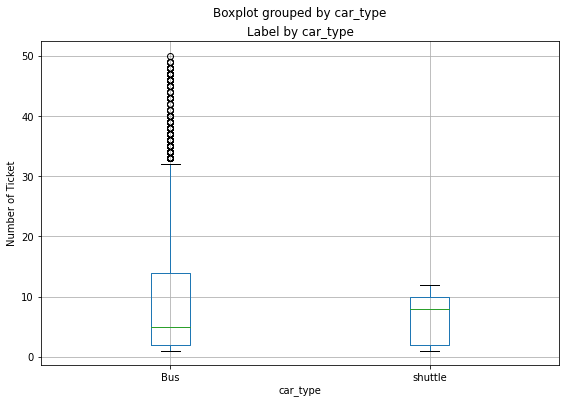

In [51]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset_new.boxplot(column = 'number_of_ticket', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Number of Ticket")
plt.show()

In [52]:
#stripplot
def strip_plot(attribute):
  for d,car in zip(datasets,dataset_new["car_type"].unique()):
    plt.figure(figsize=(18, 10))
    sns.stripplot(x=attribute, y="number_of_ticket", data=d)
    plt.xlabel("by " + car,fontsize=16)
  return attribute

'travel_from'

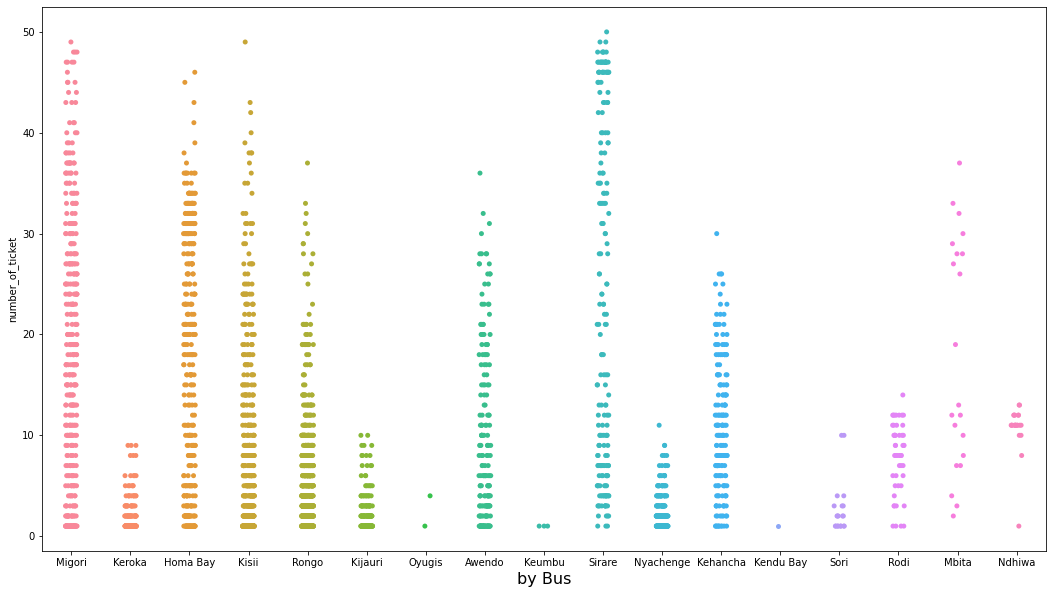

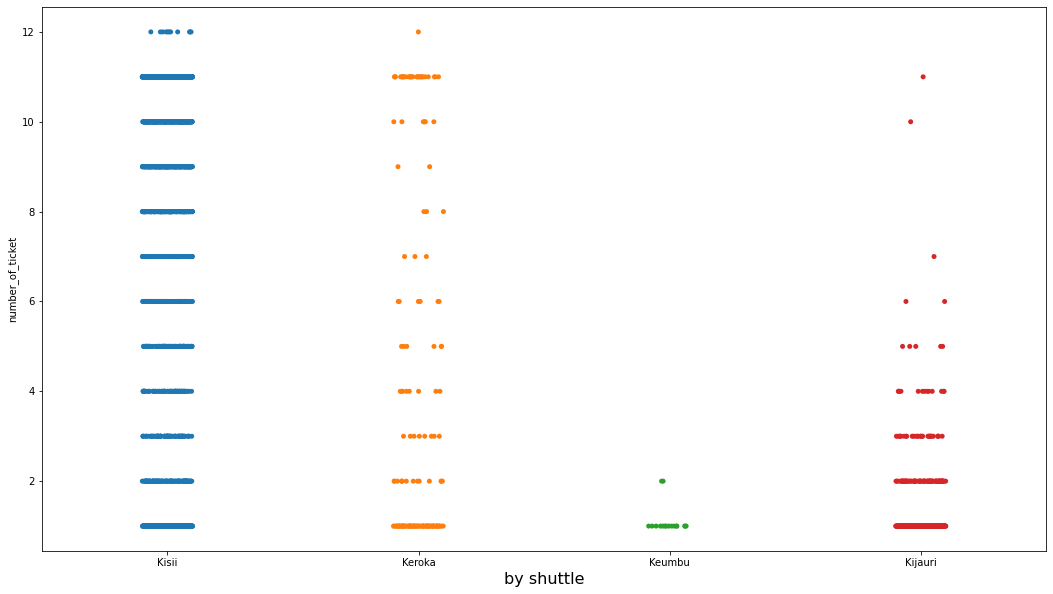

In [53]:
strip_plot("travel_from")

#**Summary:**
from the above stripplot by Bus, we conclude that number of ticket > 40 are mostly sold in Sirare and Migori.

By shuttle, we conclude that each number of ticket is sold in Kisii with almost same frequency and in keumbu town, only number of ticket 1 and 2 is sold. 



'day_of_month'

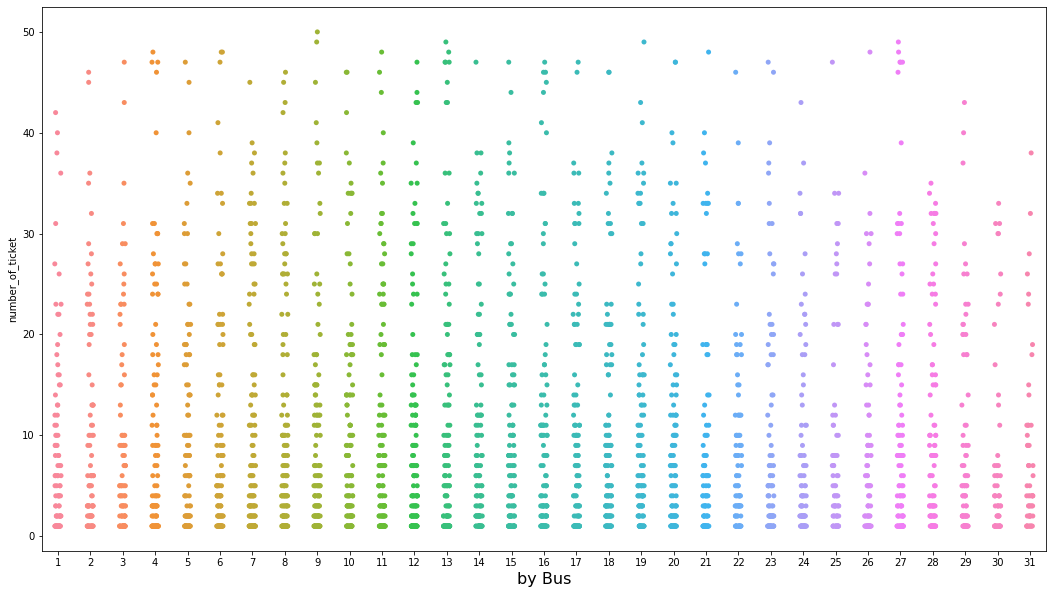

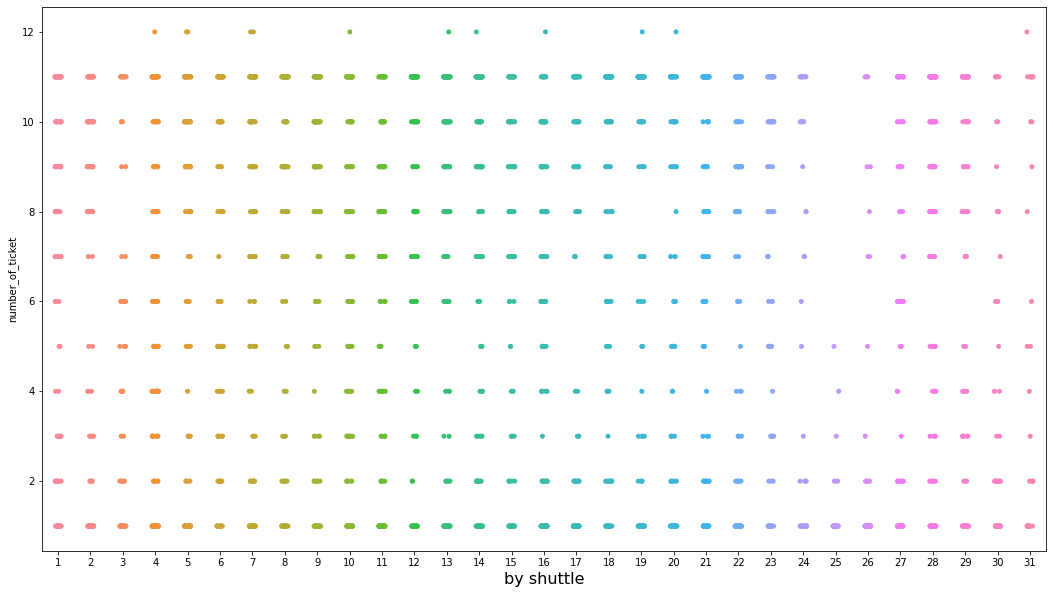

In [54]:
strip_plot("day_of_month")

# **Summary:**

we can also say that the number of tickets from 1 to 10 in each days of month are almost same. but for number of tickets > 10 in all the days of month, there is some variation.
 

'hour'

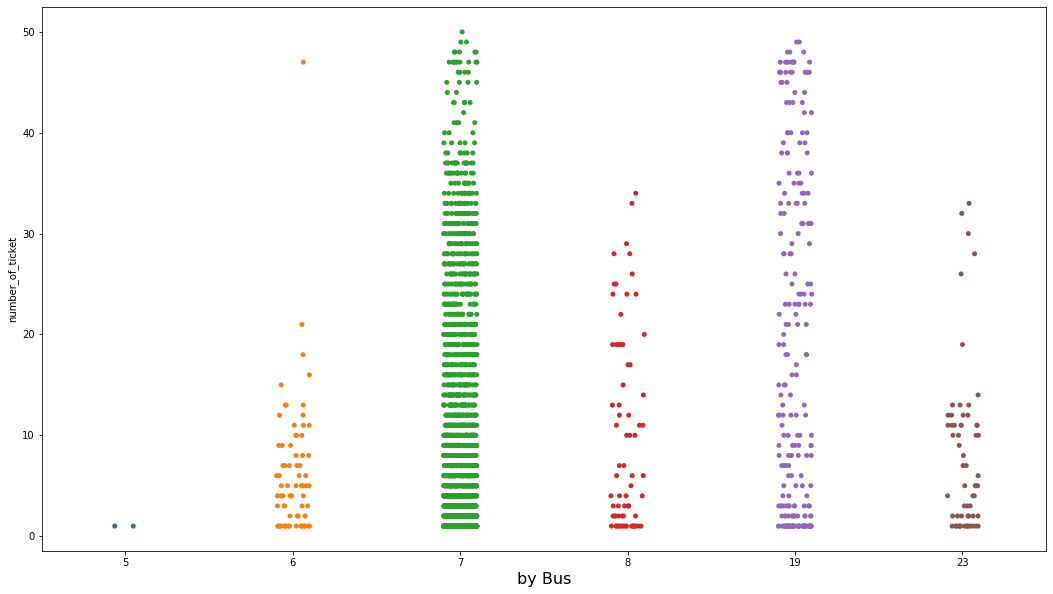

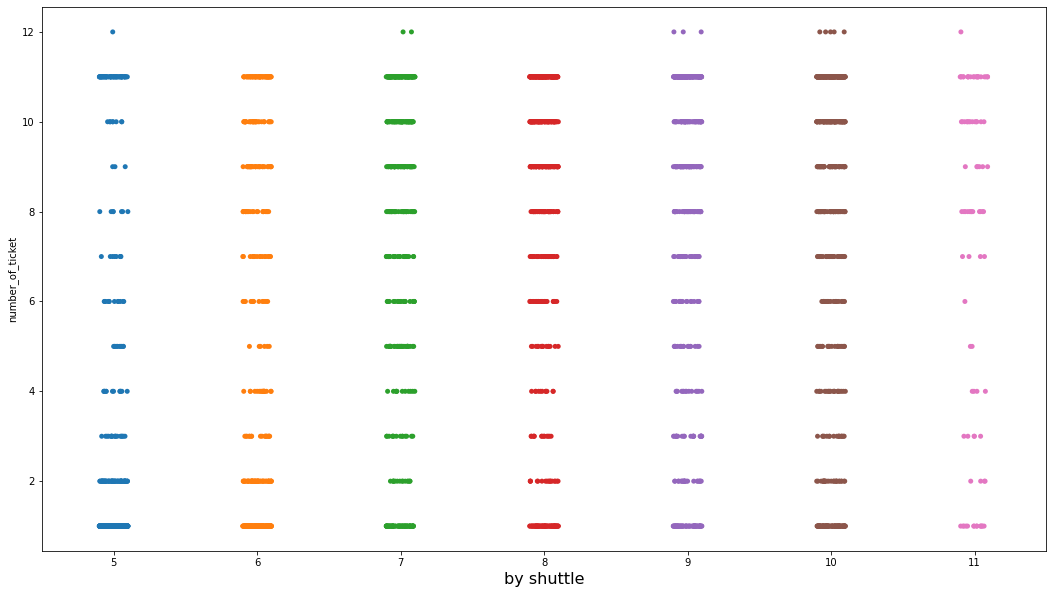

In [55]:
strip_plot("hour")

#**Summary:**
By Bus, 

* We can see that most of the tickets were sold at 7 A.M that seems true because in the morning, most of the people go to the work.

* we can say that there is no ride between 8 A.M. to 7:00 P.M and 7:00 P.M. to 11:00 P.M..

By shuttle,

* Tickets were sold with almost same frequency at each time except 11:00.

* There is a rides only between 4:00 A.M. to 12:00 P.M..


'is_weekend'

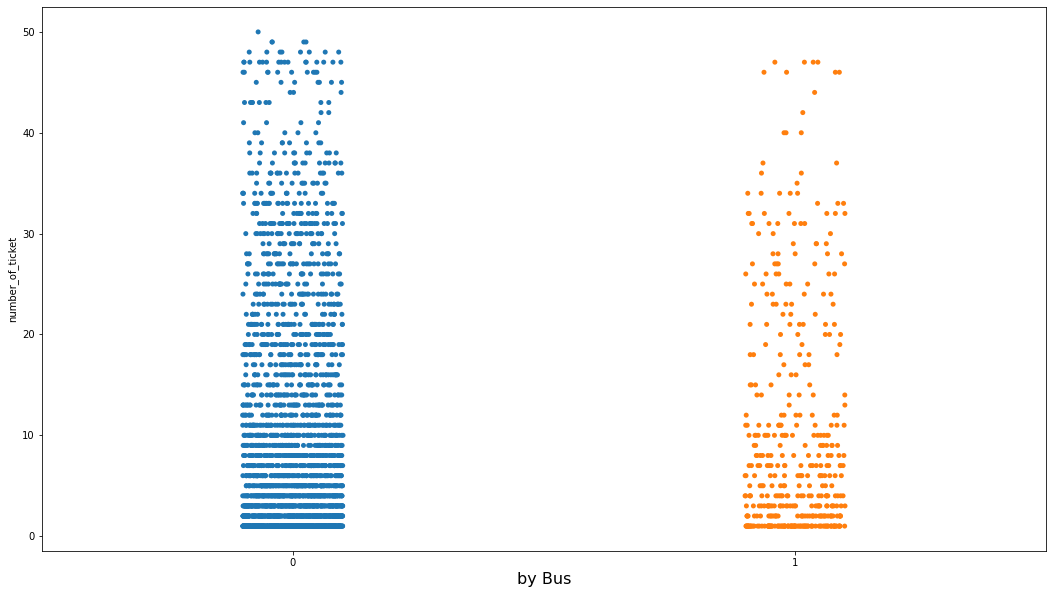

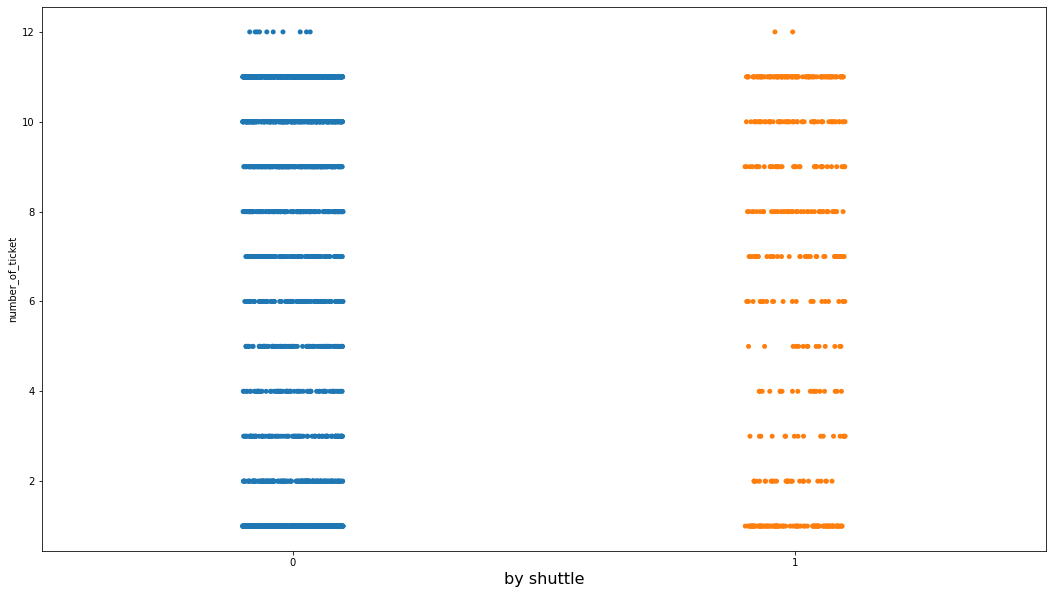

In [56]:
strip_plot("is_weekend")

#**Summary:**

Since, comparison between weekdays and weekends demand is unfair for this data,
because weekdays are 5 and weekends are only 2.

Thus, from the above plot, I conclude that there is no such difference in demand. but we see that, number of ticket more than maximum capacity is mostly on weekdays. 

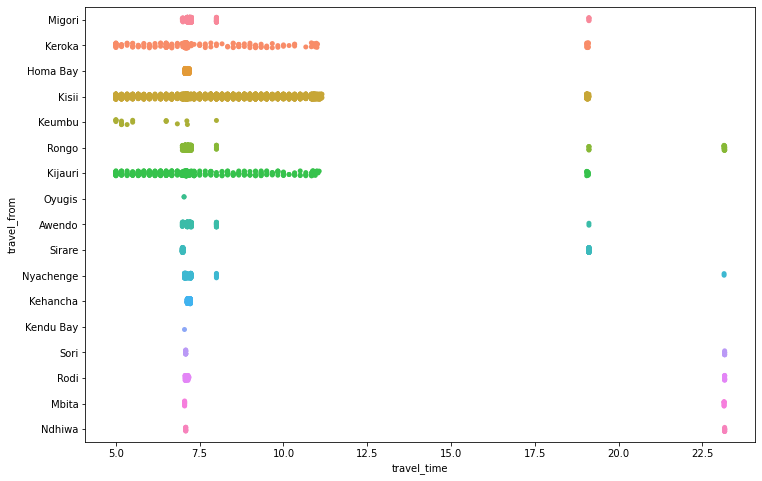

In [57]:
plt.figure(figsize=(12,8))
sns.stripplot(dataset_new["travel_time"],dataset_new["travel_from"])

Above plot is plotted between travel time and travel from and from this, we got to know the timing of car for each town.

In [58]:
#arrange in the ascending order
arr=np.sort(dataset_new["travel_time"].unique())
arr

array([ 5.        ,  5.16666667,  5.33333333,  5.5       ,  5.66666667,
        5.83333333,  6.        ,  6.16666667,  6.33333333,  6.5       ,
        6.66666667,  6.83333333,  6.96666667,  6.98333333,  7.        ,
        7.01666667,  7.03333333,  7.05      ,  7.06666667,  7.08333333,
        7.1       ,  7.11666667,  7.13333333,  7.15      ,  7.16666667,
        7.18333333,  7.2       ,  7.21666667,  7.23333333,  7.25      ,
        7.33333333,  7.5       ,  7.66666667,  7.83333333,  8.        ,
        8.16666667,  8.33333333,  8.5       ,  8.66666667,  8.83333333,
        9.        ,  9.16666667,  9.33333333,  9.5       ,  9.66666667,
        9.83333333, 10.        , 10.16666667, 10.33333333, 10.5       ,
       10.66666667, 10.83333333, 10.85      , 10.86666667, 10.88333333,
       10.9       , 10.91666667, 10.93333333, 10.95      , 10.96666667,
       10.98333333, 11.        , 11.01666667, 11.03333333, 11.05      ,
       11.06666667, 11.08333333, 11.1       , 11.11666667, 11.13

In [59]:
#define a function for shift
def shift(xs, n):
    if n >= 0:
        return np.r_[np.full(n, np.nan), xs[:-n]]
    else:
        return np.r_[xs[-n:], np.full(-n, np.nan)]

In [60]:
#take a consecutive difference 
shift(arr, -1)-arr

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.13333333, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.08333333,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       7.9       , 0.01666667, 0.01666667, 0.01666667, 0.01666

#**Summary:**
we conclude that, time between the rides of two successive vehicle in all the town is mostly 0.01666667 hour.(i.e.1 min).

but for a particular town, time between the rides of two successive vehicle would be change.

**Check Multicollinearity**

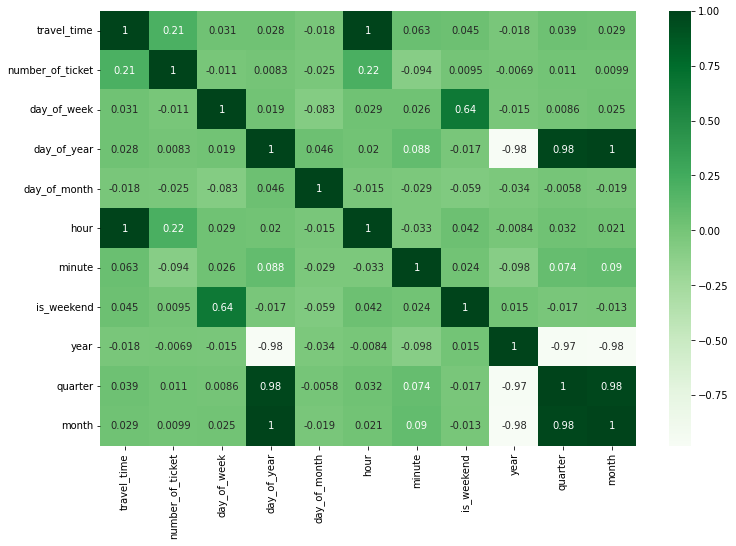

In [194]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dataset_new.corr(),annot=True,cmap="Greens")

# **Summary**

There is a high positive correlation between

1) day_of_year & month,

2) day_of_year and quarter,

3) hour and travel_time,

4) quarter and month.

There is a high negative correlation between

quarter and year,

month and year,

year and day_of_year.

In [195]:
#all numerical feature except target variable
col=set(dataset_new.describe().columns.values)-{'number_of_ticket'}

In [162]:
#Multicollinearity by VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [171]:
calc_vif(dataset_new[[i for i in col]])

,variables,VIF
0,quarter,1.154872e+02
1,minute,inf
2,month,5.795645e+04
3,year,1.536108e+03
4,day_of_month,4.441292e+02
5,hour,inf
6,day_of_week,5.742115e+00
7,day_of_year,5.255538e+04
8,travel_time,inf
9,is_weekend,2.019331e+00


In [176]:
#call the function
calc_vif(dataset_new[[i for i in col if i not in ['travel_time',"day_of_year","quarter","year"]]])

,variables,VIF
0,minute,1.939404
1,month,2.230385
2,day_of_month,3.177935
3,hour,4.684935
4,day_of_week,4.737461
5,is_weekend,1.942322


In [237]:
#required independent features
req_features=calc_vif(data[[i for i in col if i not in ['travel_time',"day_of_year","quarter","year"]]]).variables.values
req_features

array(['minute', 'month', 'day_of_month', 'hour', 'day_of_week',
       'is_weekend'], dtype=object)

# **Encoding Categorical features**

In [238]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(dataset_new, columns=['travel_from'])
label_enc = {'Bus':1,'shuttle':0 ,"Mpesa":1,"Cash":0}
data.replace(label_enc,inplace=True)

In [239]:
data.head()

,ride_id,payment_method,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,hour,minute,is_weekend,year,quarter,month,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1442,1,17-10-17,7.250000,1,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5437,1,19-11-17,7.200000,1,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5710,1,26-11-17,7.083333,1,49,1,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5777,1,27-11-17,7.166667,1,49,5,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5778,1,27-11-17,7.200000,1,49,31,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [240]:
unreqd_col=['travel_time',"day_of_year","quarter","year","ride_id","travel_date","max_capacity","date"]

In [241]:
#make a new dataframe with independent and dependent features.
dataset_new1=data.drop(columns=unreqd_col)

In [242]:
#call dataframe
dataset_new1.head()

,payment_method,car_type,number_of_ticket,day_of_week,day_of_month,hour,minute,is_weekend,month,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1,1,1,1,17,7,15,0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,1,1,6,19,7,12,1,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,1,6,26,7,5,1,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,5,0,27,7,10,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,31,0,27,7,12,0,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [243]:
#shape
dataset_new1.shape

(6249, 26)

# **Training the models**

In [244]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [246]:
#independent and dependent features
from scipy.stats import zscore  
y=dataset_new1["number_of_ticket"]
X=dataset_new1.drop(columns=["number_of_ticket"]).apply(zscore) #apply zscore for scaling

In [247]:
#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.20, random_state=42)

# **Linear Regression**

In [248]:
import math
from sklearn.linear_model import LinearRegression

In [249]:
#call the model
model = LinearRegression()
#fitting the model
model.fit(X_train1, y_train1)
# Prediction
y_pred = model.predict(X_test1)

In [250]:
# Model score on Train and Test
train_model_lr = model.score(X_train1,y_train1)
print('Training Accuracy:',train_model_lr)

test_model_lr = model.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_lr)

Training Accuracy: 0.3691896559490421
Testing Accuracy: 0.419045866201018


In [251]:
#define a function which print the result of Evaluation metrics.
def print_metrics(actual, predicted):

  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('r2 is {}'.format(r2_score(actual, predicted)))
  print("adjust_r2 is {}".format(1-(1-r2_score(y_test1, y_pred))*((X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [252]:
#call the function
print_metrics(y_test1,y_pred)

MSE is 50.68888173930134
RMSE is 7.119612471146259
r2 is 0.419045866201018
adjust_r2 is 0.40717997294531993
MAE is 4.828577393178831
MAPE is 147.37327522928746


# **Implementing Lasso Regression**

In [253]:
#model fitting
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train1, y_train1)

Lasso(alpha=0.1, max_iter=3000)

In [254]:
#Model Prediction
y_pred_l = lasso.predict(X_test1)

In [255]:
# Model score on Train and Test
train_model_llr = lasso.score(X_train1,y_train1)
print('Training Accuracy:',train_model_llr)

test_model_llr = lasso.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_llr)

Training Accuracy: 0.3657537525328868
Testing Accuracy: 0.40917112723582993


In [256]:
#Evaluation metrics
print_metrics(y_test1,y_pred_l)

MSE is 51.550463483009324
RMSE is 7.179865143789911
r2 is 0.40917112723582993
adjust_r2 is 0.40717997294531993
MAE is 4.878575489303061
MAPE is 151.06113232107106


#**Cross Validation for Lasso Regression**

In [257]:
from sklearn.model_selection import GridSearchCV

In [258]:
### Cross validation and hyperparameter tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train1, y_train1)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [259]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -45.712281405497485


In [260]:
#Model Prediction
y_pred_lasso = lasso_regressor.predict(X_test1)

In [261]:
# Model score on Train and Test
train_model_lrh = lasso_regressor.score(X_train1,y_train1)
print('Training Accuracy:',train_model_lrh)

test_model_lrh = lasso_regressor.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_lrh)

Training Accuracy: -44.964579194880486
Testing Accuracy: -50.793626348786724


In [262]:
#Evaluation metrics
print_metrics(y_test1,y_pred_lasso)

MSE is 50.793626348786724
RMSE is 7.126964736042035
r2 is 0.41784536992282695
adjust_r2 is 0.40717997294531993
MAE is 4.825183039758834
MAPE is 147.4951077762842


**ACCURACY TERMS**

Accuracy may be positive or negative


# **Implementing Ridge Regression**

In [263]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [264]:
ridge.fit(X_train1,y_train1)

Ridge(alpha=0.1)

In [265]:
ridge.score(X_train1, y_train1)

0.3692359680279922

In [266]:
#Model Prediction
y_pred_r = ridge.predict(X_test1)

In [267]:
# Model score on Train and Test
train_model_rr = ridge.score(X_train1,y_train1)
print('Training Accuracy:',train_model_rr)

test_model_rr = ridge.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_rr)

Training Accuracy: 0.3692359680279922
Testing Accuracy: 0.41855187669922733


In [268]:
#Evaluation metrics
print_metrics(y_test1,y_pred_r)

MSE is 50.73198286205776
RMSE is 7.1226387569536165
r2 is 0.41855187669922733
adjust_r2 is 0.40717997294531993
MAE is 4.820127968873578
MAPE is 147.11364293580897


#**Cross Validation for Ridge Regression**

In [269]:
# Cross validation and Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train1,y_train1)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [270]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  -45.71102140956477


In [271]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test1)

In [272]:
# Model score on Train and Test
train_model_rrh = ridge_regressor.score(X_train1,y_train1)
print('Training Accuracy:',train_model_rrh)

test_model_rrh = ridge_regressor.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_rrh)

Training Accuracy: -44.96577757968879
Testing Accuracy: -50.833510609883305


In [273]:
#Evaluation metrics
print_metrics(y_test1,y_pred_ridge)

MSE is 50.833510609883305
RMSE is 7.129762310896718
r2 is 0.41738824943481245
adjust_r2 is 0.40717997294531993
MAE is 4.828521489304503
MAPE is 147.7260645491132


#**Implementing Elastic net Regression**

In [274]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [275]:
elasticnet.fit(X_train1,y_train1)

ElasticNet(alpha=0.1)

In [276]:
#model prediction
y_pred_en = elasticnet.predict(X_test1)

In [277]:
# Model score on Train and Test
train_model_en = elasticnet.score(X_train1,y_train1)
print('Training Accuracy:',train_model_en)

test_model_en = elasticnet.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_en)

Training Accuracy: 0.36608758674898645
Testing Accuracy: 0.40778655324659707


In [278]:
#Evaluation metrics
print_metrics(y_test1,y_pred_en)

MSE is 51.6712690735309
RMSE is 7.188273024414897
r2 is 0.40778655324659707
adjust_r2 is 0.40717997294531993
MAE is 4.8799168763836995
MAPE is 151.3894957300289


#**Running Grid Search Cross Validation for ELastic Net Regression**

In [279]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [280]:
#model prediction
y_pred_elastic = elastic_regressor.predict(X_test1)

In [281]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.6}

Using  {'alpha': 0.01, 'l1_ratio': 0.6}  the negative mean squared error is:  -45.88417482125764


In [282]:
# Model score on Train and Test
train_model_enh = elastic_regressor.score(X_train1,y_train1)
print('Training Accuracy:',train_model_enh)

test_model_enh = elastic_regressor.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_enh)

Training Accuracy: -44.964465771567376
Testing Accuracy: -50.80574434839085


In [283]:
1#Evaluation metrics
print_metrics(y_test1,y_pred_elastic)

MSE is 50.80574434839085
RMSE is 7.127814836848026
r2 is 0.4177064834111931
adjust_r2 is 0.40717997294531993
MAE is 4.826069260537935
MAPE is 147.56562258951865


#**Decision Tree**


In [284]:
decision_tree_data = data.copy()

In [285]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id','number_of_ticket','date',"travel_date",'max_capacity']

In [286]:
# creating dependent and independant variable.
x= decision_tree_data.drop(unnecessary_cols, axis=1)
Y= decision_tree_data['number_of_ticket']

In [287]:
#train and test split
X_train , X_test, y_train, y_test = train_test_split(x,Y, test_size= 0.3, random_state=0 )

In [288]:
from sklearn.tree import DecisionTreeRegressor
# fitting decision tree model
tree_model = DecisionTreeRegressor( criterion='squared_error', max_leaf_nodes=30,max_depth= 30,random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=30, random_state=0)

In [289]:
y_pred_tr = tree_model.predict(X_test)

In [290]:
# Model score on Train and Test
train_model_tr = tree_model.score(X_train,y_train)
print('Training Accuracy:',train_model_tr)

test_model_tr = tree_model.score(X_test,y_test)
print('Testing Accuracy:',test_model_tr)


Training Accuracy: 0.6138768837191855
Testing Accuracy: 0.5684942568569067


In [291]:
#Evaluation metrics
print_metrics(y_test,y_pred_tr)

MSE is 32.57962409804327
RMSE is 5.707856348756796
r2 is 0.5684942568569067
adjust_r2 is 0.40717997294531993
MAE is 3.9213770811096915
MAPE is 138.1622900789423


We can see we are not getting good score so far, Lets try "Ensemble methods"

#**Random Forest**


In [292]:
from sklearn.ensemble import RandomForestRegressor

In [293]:
random_reg = RandomForestRegressor()

In [294]:
random_reg.fit(X_train,y_train)

RandomForestRegressor()

In [295]:
y_pred_rf = random_reg.predict(X_test)

In [296]:
# Model score on Train and Test
train_model_rf = random_reg.score(X_train,y_train)
print('Training Accuracy:',train_model_rf)

test_model_rf = random_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model_rf)


Training Accuracy: 0.9547531402582728
Testing Accuracy: 0.6794290703154624


In [297]:
#Evaluation metrics
print_metrics(y_test,y_pred_rf)

MSE is 24.203803893333333
RMSE is 4.919736160947387
r2 is 0.6794290703154624
adjust_r2 is 0.40717997294531993
MAE is 3.124496
MAPE is 100.46926949822128


as we saw the accuracy of train and test data, we say that Our model seem to overfit lets do hyperperemeter tuning using GridSearchCV.

# **Random forest Regressor using GridSearchCV**

In [298]:
from sklearn.model_selection import GridSearchCV

In [299]:
random_grid ={'criterion': ['squared_error'],
 'max_depth':[655,660,670],
 'max_features': ['log2'],
 'min_samples_leaf':[6],
 'min_samples_split': [5],
 'n_estimators': [500,550,650]}

In [300]:
estimator = RandomForestRegressor()
grid = GridSearchCV( estimator=estimator, param_grid =random_grid, cv=3, verbose=1
                               ,n_jobs=-1 )

In [301]:
grid.fit(x,Y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [655, 660, 670], 'max_features': ['log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [5],
                         'n_estimators': [500, 550, 650]},
             verbose=1)

In [302]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 655,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 500}

In [303]:
#model prediction
y_pred_rfh = grid.predict(X_test)

In [304]:
# Model score on Train and Test
train_model_rfh = grid.score(X_train,y_train)
print('Training Accuracy:',train_model_rfh)

test_model_rfh = grid.score(X_test,y_test)
print('Testing Accuracy:',test_model_rfh)

Training Accuracy: 0.6867158912666116
Testing Accuracy: 0.6978826875151742


In [305]:
#Evaluation metrics
print_metrics(y_test,y_pred_rfh)

MSE is 22.810515574071204
RMSE is 4.776035549917023
r2 is 0.6978826875151742
adjust_r2 is 0.40717997294531993
MAE is 3.2451926383403045
MAPE is 112.75116584710297


# **Random Forest Important Features**

In [306]:
# arry of important features
importance = grid.best_estimator_.feature_importances_
importance

array([0.00021724, 0.18105923, 0.0208055 , 0.02065715, 0.07084976,
       0.03728536, 0.06645966, 0.10348045, 0.0029443 , 0.00394451,
       0.01101702, 0.03025248, 0.0082834 , 0.1002391 , 0.00693855,
       0.        , 0.0206034 , 0.00047542, 0.04456798, 0.02343247,
       0.00356612, 0.10636845, 0.00055598, 0.01693835, 0.        ,
       0.00109008, 0.02763118, 0.08935349, 0.00098337])

Text(0.5, 0, 'Random Forest Feature Importance')

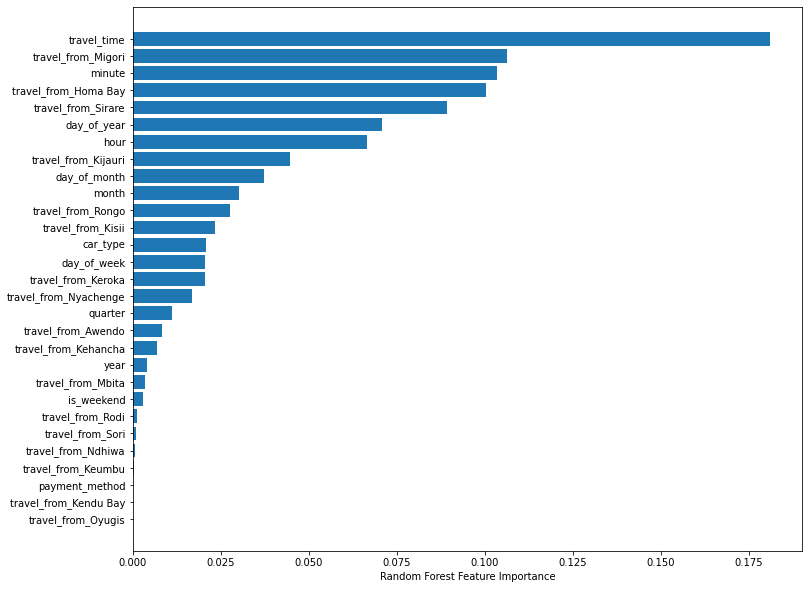

In [307]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = grid.best_estimator_.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

# **XGboost**

In [308]:
import xgboost as xgb

In [309]:
xgb_reg = xgb.XGBRegressor(
                        booster= 'gbtree',
                        eta= 0.004,
                        learning_rate= 0.1,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        scale_pos_weight= 1,
                        verbosity= 1)

In [310]:
xgb_reg.fit(X_train,y_train)

[17:58:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.004, max_depth=7, min_child_weight=10)

In [311]:
#model prediction
y_pred_xgb = xgb_reg.predict(X_test)

In [312]:
# Model score on Train and Test
train_model_xgb = xgb_reg.score(X_train,y_train)
print('Training Accuracy:',train_model_xgb)

test_model_xgb = xgb_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model_xgb)

Training Accuracy: 0.7839187316924519
Testing Accuracy: 0.6806833304764424


In [313]:
#Evaluation metrics
print_metrics(y_test,y_pred_xgb)

MSE is 24.109104517449648
RMSE is 4.910102291953768
r2 is 0.6806833304764424
adjust_r2 is 0.40717997294531993
MAE is 3.2796574227492012
MAPE is 108.20892305397096


# **XGboost using GridSearchCV**

In [314]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [315]:
xgb = xgb.XGBRegressor()

In [316]:
params = {"min_child_weight":[9,10,11], 
          'eta': [0.05,0.06,0.07],
          'eval_metric':['rmse'], 
          'colsample_bytree':[0.6],
          'max_depth': [8,9,10],
          }

In [317]:
xgb_grid = GridSearchCV(xgb,param_grid=params, verbose=1,cv=5)
xgb_grid.fit(x, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[17:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:54] WARNING: /workspace/src/objective/regr

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.6], 'eta': [0.05, 0.06, 0.07],
                         'eval_metric': ['rmse'], 'max_depth': [8, 9, 10],
                         'min_child_weight': [9, 10, 11]},
             verbose=1)

In [318]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 10,
 'min_child_weight': 11}

In [319]:
xgb_grid.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 11,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.05,
 'eval_metric': 'rmse'}

In [320]:
y_pred_xgbh = xgb_grid.predict(X_test)

In [321]:
# Model score on Train and Test
train_model_xgh = xgb_grid.score(X_train,y_train)
print('Training Accuracy:',train_model_xgh)

test_model_xgh = xgb_grid.score(X_test,y_test)
print('Testing Accuracy:',test_model_xgh)

Training Accuracy: 0.8275616394052885
Testing Accuracy: 0.8318518771838029


In [322]:
#Evaluation metrics
print_metrics(y_test,y_pred_xgbh)

MSE is 12.695549760798118
RMSE is 3.563081497916953
r2 is 0.8318518771838029
adjust_r2 is 0.40717997294531993
MAE is 2.4001465358098346
MAPE is 76.92070338412591


# **Xgboost Important Features**

In [323]:
# arry of important features
importance = xgb_grid.best_estimator_.feature_importances_
importance

array([0.00145116, 0.02162595, 0.01236969, 0.00375218, 0.0094933 ,
       0.00496684, 0.0383398 , 0.01131485, 0.00601739, 0.00357939,
       0.00548445, 0.00687156, 0.02765695, 0.15798819, 0.01837889,
       0.        , 0.04373601, 0.00406587, 0.06886235, 0.02293158,
       0.01432019, 0.27395216, 0.00225171, 0.04298488, 0.        ,
       0.01241049, 0.02286533, 0.15463671, 0.00769211], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

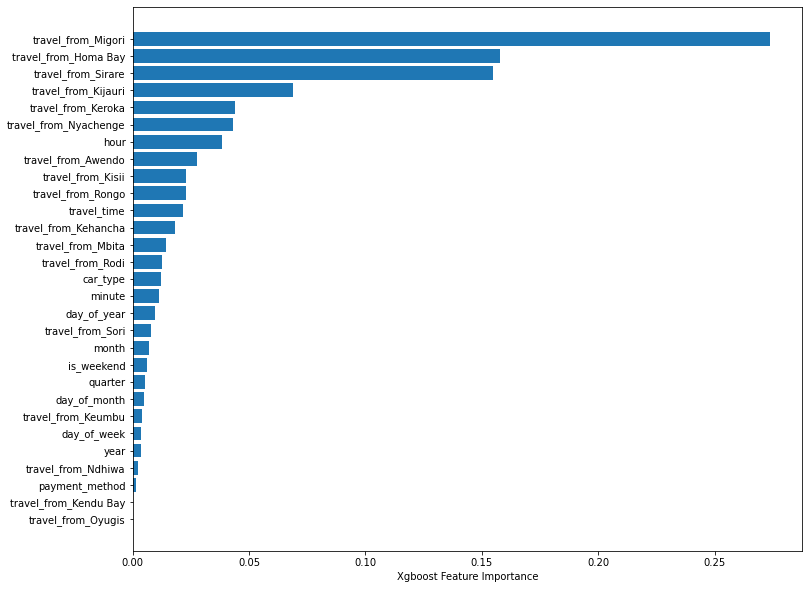

In [324]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = xgb_grid.best_estimator_.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Xgboost Feature Importance')

We can see the list of most important features in our data in above barplot.

# **Evaluating all models**

In [325]:
#evaluation metrics for all classifiers
Model = ["Linear Regression","Lasso Regression","Ridge Regression","Decision Tree",'Random Forest','Xgboost']
Train_Accuracy=  [train_model_lr,train_model_lrh, train_model_rrh,train_model_tr, train_model_rfh, train_model_xgh]
Test_Accuracy = [test_model_lr,test_model_lrh, test_model_rrh,test_model_tr, test_model_rfh, test_model_xgh]

In [330]:
#creating dataframe for all classifiers using dictionary
pd.DataFrame({"Model":Model,"Train Accuracy":Train_Accuracy,'Test Accuracy': Test_Accuracy,
'r2_score':[0.419045,0.417845,0.417388,0.568494,0.69788,0.83185],
'Adjusted r2_score':[0.407179,0.407179,0.407179,0.407179,0.407179,0.407179],
'MSE':[50.68888,50.793626,50.83351,32.579624,22.810515,12.695549],
'RMSE':[7.119612,7.126964,7.12976,5.707856,4.776035,3.56308],
'MAE':[4.828577,4.82518,4.828521,3.921377,3.245192,2.400146],
'MAPE':[147.373275,147.495107,147.726064,138.16229,112.751165,76.920703]})

,Model,Train Accuracy,Test Accuracy,r2_score,Adjusted r2_score,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.369190,0.419046,0.419045,0.407179,50.688880,7.119612,4.828577,147.373275
1,Lasso Regression,-44.964579,-50.793626,0.417845,0.407179,50.793626,7.126964,4.825180,147.495107
2,Ridge Regression,-44.965778,-50.833511,0.417388,0.407179,50.833510,7.129760,4.828521,147.726064
3,Decision Tree,0.613877,0.568494,0.568494,0.407179,32.579624,5.707856,3.921377,138.162290
4,Random Forest,0.686716,0.697883,0.697880,0.407179,22.810515,4.776035,3.245192,112.751165
5,Xgboost,0.827562,0.831852,0.831850,0.407179,12.695549,3.563080,2.400146,76.920703


Observation:

We can see from above table that 

1) Xgboost have highest Training and Testing Accuracy.

2) Xgboost also have best r2 score.

3) It also have minimum MSE, RMSE, MAE and MAPE errors.

Hence we can say that Xgboost is the best Model.

# **Conclusion**

1.    **As we have implemented six different models to predict the number of seats that Mobiticket can expect to sell for each ride. Linear Regression, Regularized linear regression (Ridge and Lasso), Decision Tree, Random Forest Regressor and Xgboost Regressor.
Xgboost regression model with hyperparameter tuning performed the best among them.**
2.    **Our Model will help Mobiticket and Bus operators to anticipate the number of tickets they can expect to sell for each ride.**

**Thank you** 🙂